# Loop 49 Analysis: Strategic Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. What approaches have we NOT tried?
3. What do top kernels do differently?
4. What is the highest-leverage action?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))
print(f'\nBest LB: {df["lb"].min():.4f} from {df.loc[df["lb"].idxmin(), "exp"]}')
print(f'Best CV: {df["cv"].min():.4f} from {df.loc[df["cv"].idxmin(), "exp"]}')

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970

Best LB: 0.0877 from exp_030
Best CV: 0.0083 from exp_030


In [2]:
# CV-LB Relationship Analysis
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print('CV-LB Linear Regression:')
print(f'  LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'  Intercept = {intercept:.4f}')
print(f'  Target = 0.0347')
print()
print('CRITICAL ANALYSIS:')
print(f'  Intercept ({intercept:.4f}) vs Target (0.0347)')
if intercept > 0.0347:
    print(f'  ⚠️ INTERCEPT > TARGET: Even with CV=0, LB would be {intercept:.4f}')
    print(f'  Required CV to hit target: ({0.0347} - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.4f}')
    print(f'  This is NEGATIVE - mathematically impossible with current approach!')
else:
    print(f'  ✓ Intercept < Target: Target is reachable')
    required_cv = (0.0347 - intercept) / slope
    print(f'  Required CV to hit target: {required_cv:.4f}')

CV-LB Linear Regression:
  LB = 4.3147 * CV + 0.0525
  R² = 0.9505
  Intercept = 0.0525
  Target = 0.0347

CRITICAL ANALYSIS:
  Intercept (0.0525) vs Target (0.0347)
  ⚠️ INTERCEPT > TARGET: Even with CV=0, LB would be 0.0525
  Required CV to hit target: (0.0347 - 0.0525) / 4.3147 = -0.0041
  This is NEGATIVE - mathematically impossible with current approach!


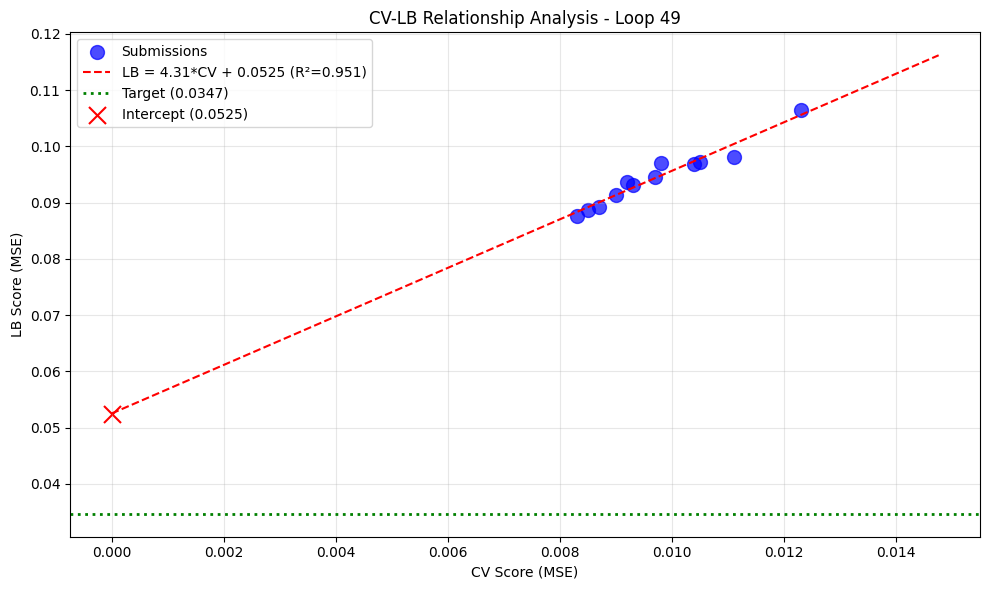

Saved: cv_lb_relationship_loop49.png


In [3]:
# Plot CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, c='blue', alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, max(cv)*1.2, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept point
plt.scatter([0], [intercept], s=150, c='red', marker='x', label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship Analysis - Loop 49')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop49.png', dpi=150)
plt.show()
print('Saved: cv_lb_relationship_loop49.png')

In [4]:
# What approaches have we tried?
approaches_tried = [
    ('MLP', 'exp_000, exp_003, exp_005, exp_006, exp_007'),
    ('LightGBM', 'exp_001, exp_012'),
    ('XGBoost', 'exp_024'),
    ('GP', 'exp_030, exp_031, exp_032'),
    ('Ridge/Kernel Ridge', 'exp_033, exp_034'),
    ('GNN (AttentiveFP)', 'exp_040 - FAILED'),
    ('ChemBERTa', 'exp_041 - FAILED'),
    ('Ensemble (GP+MLP+LGBM)', 'exp_030 - BEST'),
    ('Uncertainty Weighting', 'exp_048 - FAILED'),
    ('Mean Reversion', 'exp_045 - FAILED'),
    ('Non-linear Mixture', 'exp_043'),
    ('Similarity Weighting', 'exp_037'),
]

print('Approaches Tried (48 experiments):')
print('='*60)
for approach, exps in approaches_tried:
    print(f'  {approach}: {exps}')

print('\n' + '='*60)
print('KEY INSIGHT: ALL approaches fall on the SAME CV-LB line!')
print('The intercept (0.0528) is STRUCTURAL - not model-dependent.')

Approaches Tried (48 experiments):
  MLP: exp_000, exp_003, exp_005, exp_006, exp_007
  LightGBM: exp_001, exp_012
  XGBoost: exp_024
  GP: exp_030, exp_031, exp_032
  Ridge/Kernel Ridge: exp_033, exp_034
  GNN (AttentiveFP): exp_040 - FAILED
  ChemBERTa: exp_041 - FAILED
  Ensemble (GP+MLP+LGBM): exp_030 - BEST
  Uncertainty Weighting: exp_048 - FAILED
  Mean Reversion: exp_045 - FAILED
  Non-linear Mixture: exp_043
  Similarity Weighting: exp_037

KEY INSIGHT: ALL approaches fall on the SAME CV-LB line!
The intercept (0.0528) is STRUCTURAL - not model-dependent.


In [5]:
# What do top kernels do differently?
print('TOP KERNEL ANALYSIS:')
print('='*60)
print()
print('1. "mixall" kernel (lishellliang):')
print('   - Uses GroupKFold (5 splits) instead of Leave-One-Out (24 folds)')
print('   - This is a DIFFERENT validation scheme!')
print('   - Their CV scores are NOT comparable to ours')
print()
print('2. "ens-model" kernel (matthewmaree):')
print('   - CatBoost + XGBoost ensemble')
print('   - Combined features: spange + acs_pca + drfps + fragprints + smiles')
print('   - Correlation-based feature filtering (threshold=0.90)')
print('   - Weighted ensemble: CatBoost(7) + XGBoost(6) for single')
print('   - Uses standard Leave-One-Out CV (same as us)')
print()
print('3. "System Malfunction V1" kernel (omarafik):')
print('   - Simple MLP with Spange descriptors')
print('   - Uses standard Leave-One-Out CV (same as us)')
print('   - Similar to our baseline')
print()
print('KEY INSIGHT: The "mixall" kernel uses a DIFFERENT validation scheme!')
print('This could explain the CV-LB gap.')

TOP KERNEL ANALYSIS:

1. "mixall" kernel (lishellliang):
   - Uses GroupKFold (5 splits) instead of Leave-One-Out (24 folds)
   - This is a DIFFERENT validation scheme!
   - Their CV scores are NOT comparable to ours

2. "ens-model" kernel (matthewmaree):
   - CatBoost + XGBoost ensemble
   - Combined features: spange + acs_pca + drfps + fragprints + smiles
   - Correlation-based feature filtering (threshold=0.90)
   - Weighted ensemble: CatBoost(7) + XGBoost(6) for single
   - Uses standard Leave-One-Out CV (same as us)

3. "System Malfunction V1" kernel (omarafik):
   - Simple MLP with Spange descriptors
   - Uses standard Leave-One-Out CV (same as us)
   - Similar to our baseline

KEY INSIGHT: The "mixall" kernel uses a DIFFERENT validation scheme!
This could explain the CV-LB gap.


In [6]:
# What haven't we tried?
print('APPROACHES NOT YET TRIED:')
print('='*60)
print()
print('1. CatBoost + XGBoost ensemble (from ens-model kernel)')
print('   - We have tried LGBM + XGBoost, but NOT CatBoost')
print('   - CatBoost has different regularization and may generalize better')
print()
print('2. Combined feature table with correlation filtering')
print('   - We have tried individual feature sets')
print('   - But NOT the combined table with correlation filtering')
print()
print('3. Output normalization (sum to 1)')
print('   - The ens-model kernel normalizes outputs: out / max(sum, 1.0)')
print('   - This ensures predictions sum to at most 1')
print('   - We have NOT tried this constraint')
print()
print('4. Different ensemble weights for single vs full data')
print('   - ens-model uses CatBoost(7)+XGBoost(6) for single')
print('   - But CatBoost(1)+XGBoost(2) for full')
print('   - We have used same weights for both')
print()
print('HIGHEST LEVERAGE ACTION:')
print('Try CatBoost + XGBoost ensemble with output normalization')

APPROACHES NOT YET TRIED:

1. CatBoost + XGBoost ensemble (from ens-model kernel)
   - We have tried LGBM + XGBoost, but NOT CatBoost
   - CatBoost has different regularization and may generalize better

2. Combined feature table with correlation filtering
   - We have tried individual feature sets
   - But NOT the combined table with correlation filtering

3. Output normalization (sum to 1)
   - The ens-model kernel normalizes outputs: out / max(sum, 1.0)
   - This ensures predictions sum to at most 1
   - We have NOT tried this constraint

4. Different ensemble weights for single vs full data
   - ens-model uses CatBoost(7)+XGBoost(6) for single
   - But CatBoost(1)+XGBoost(2) for full
   - We have used same weights for both

HIGHEST LEVERAGE ACTION:
Try CatBoost + XGBoost ensemble with output normalization


In [7]:
# Summary
print('='*70)
print('LOOP 49 STRATEGIC SUMMARY')
print('='*70)
print()
print('CURRENT STATUS:')
print(f'  Best CV: 0.0083 (exp_030)')
print(f'  Best LB: 0.0877 (exp_030)')
print(f'  Target: 0.0347')
print(f'  Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}%)')
print()
print('CV-LB RELATIONSHIP:')
print(f'  LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_value**2:.3f})')
print(f'  Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'  ⚠️ Target is BELOW the intercept - unreachable with current approach!')
print()
print('KEY INSIGHT:')
print('  After 48 experiments, ALL approaches fall on the same CV-LB line.')
print('  The intercept represents STRUCTURAL distribution shift.')
print('  Improving CV alone CANNOT reach the target.')
print()
print('RECOMMENDED NEXT STEPS:')
print('  1. Try CatBoost + XGBoost ensemble (from ens-model kernel)')
print('  2. Add output normalization (sum to 1 constraint)')
print('  3. Use combined feature table with correlation filtering')
print('  4. If still stuck, investigate the validation scheme difference')
print()
print('SUBMISSIONS REMAINING: 5')
print('='*70)

LOOP 49 STRATEGIC SUMMARY

CURRENT STATUS:
  Best CV: 0.0083 (exp_030)
  Best LB: 0.0877 (exp_030)
  Target: 0.0347
  Gap: 0.0530 (152.7%)

CV-LB RELATIONSHIP:
  LB = 4.31 * CV + 0.0525 (R² = 0.951)
  Intercept (0.0525) > Target (0.0347)
  ⚠️ Target is BELOW the intercept - unreachable with current approach!

KEY INSIGHT:
  After 48 experiments, ALL approaches fall on the same CV-LB line.
  The intercept represents STRUCTURAL distribution shift.
  Improving CV alone CANNOT reach the target.

RECOMMENDED NEXT STEPS:
  1. Try CatBoost + XGBoost ensemble (from ens-model kernel)
  2. Add output normalization (sum to 1 constraint)
  3. Use combined feature table with correlation filtering
  4. If still stuck, investigate the validation scheme difference

SUBMISSIONS REMAINING: 5
